<a href="https://colab.research.google.com/github/ayughosh/Machine-Learning/blob/main/ML_DA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded=files.upload()

Saving indian_liver_patient.csv to indian_liver_patient.csv


In [ ]:
import pandas as pd
dataset=pd.read_csv('indian_liver_patient.csv')
dataset=dataset.dropna()

In [ ]:
dataset['Gender']=dataset['Gender'].map({'Male':1 , 'Female':0})

In [ ]:
dataset.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Liver_disease
0,65,0,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,1,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,1,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,1,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,1,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [ ]:
X=dataset.drop('Liver_disease', axis='columns')
y=dataset['Liver_disease']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.1, random_state=40)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
clf=DecisionTreeClassifier()
clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
y_pred=clf.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
accuracy_score(y_test, y_pred)

0.6724137931034483

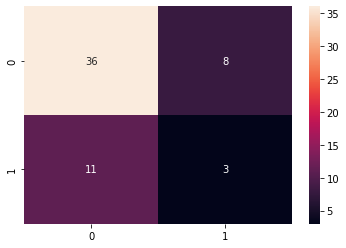

In [ ]:
import seaborn as sns
cm=confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True)

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.77      0.82      0.79        44
           2       0.27      0.21      0.24        14

    accuracy                           0.67        58
   macro avg       0.52      0.52      0.52        58
weighted avg       0.65      0.67      0.66        58



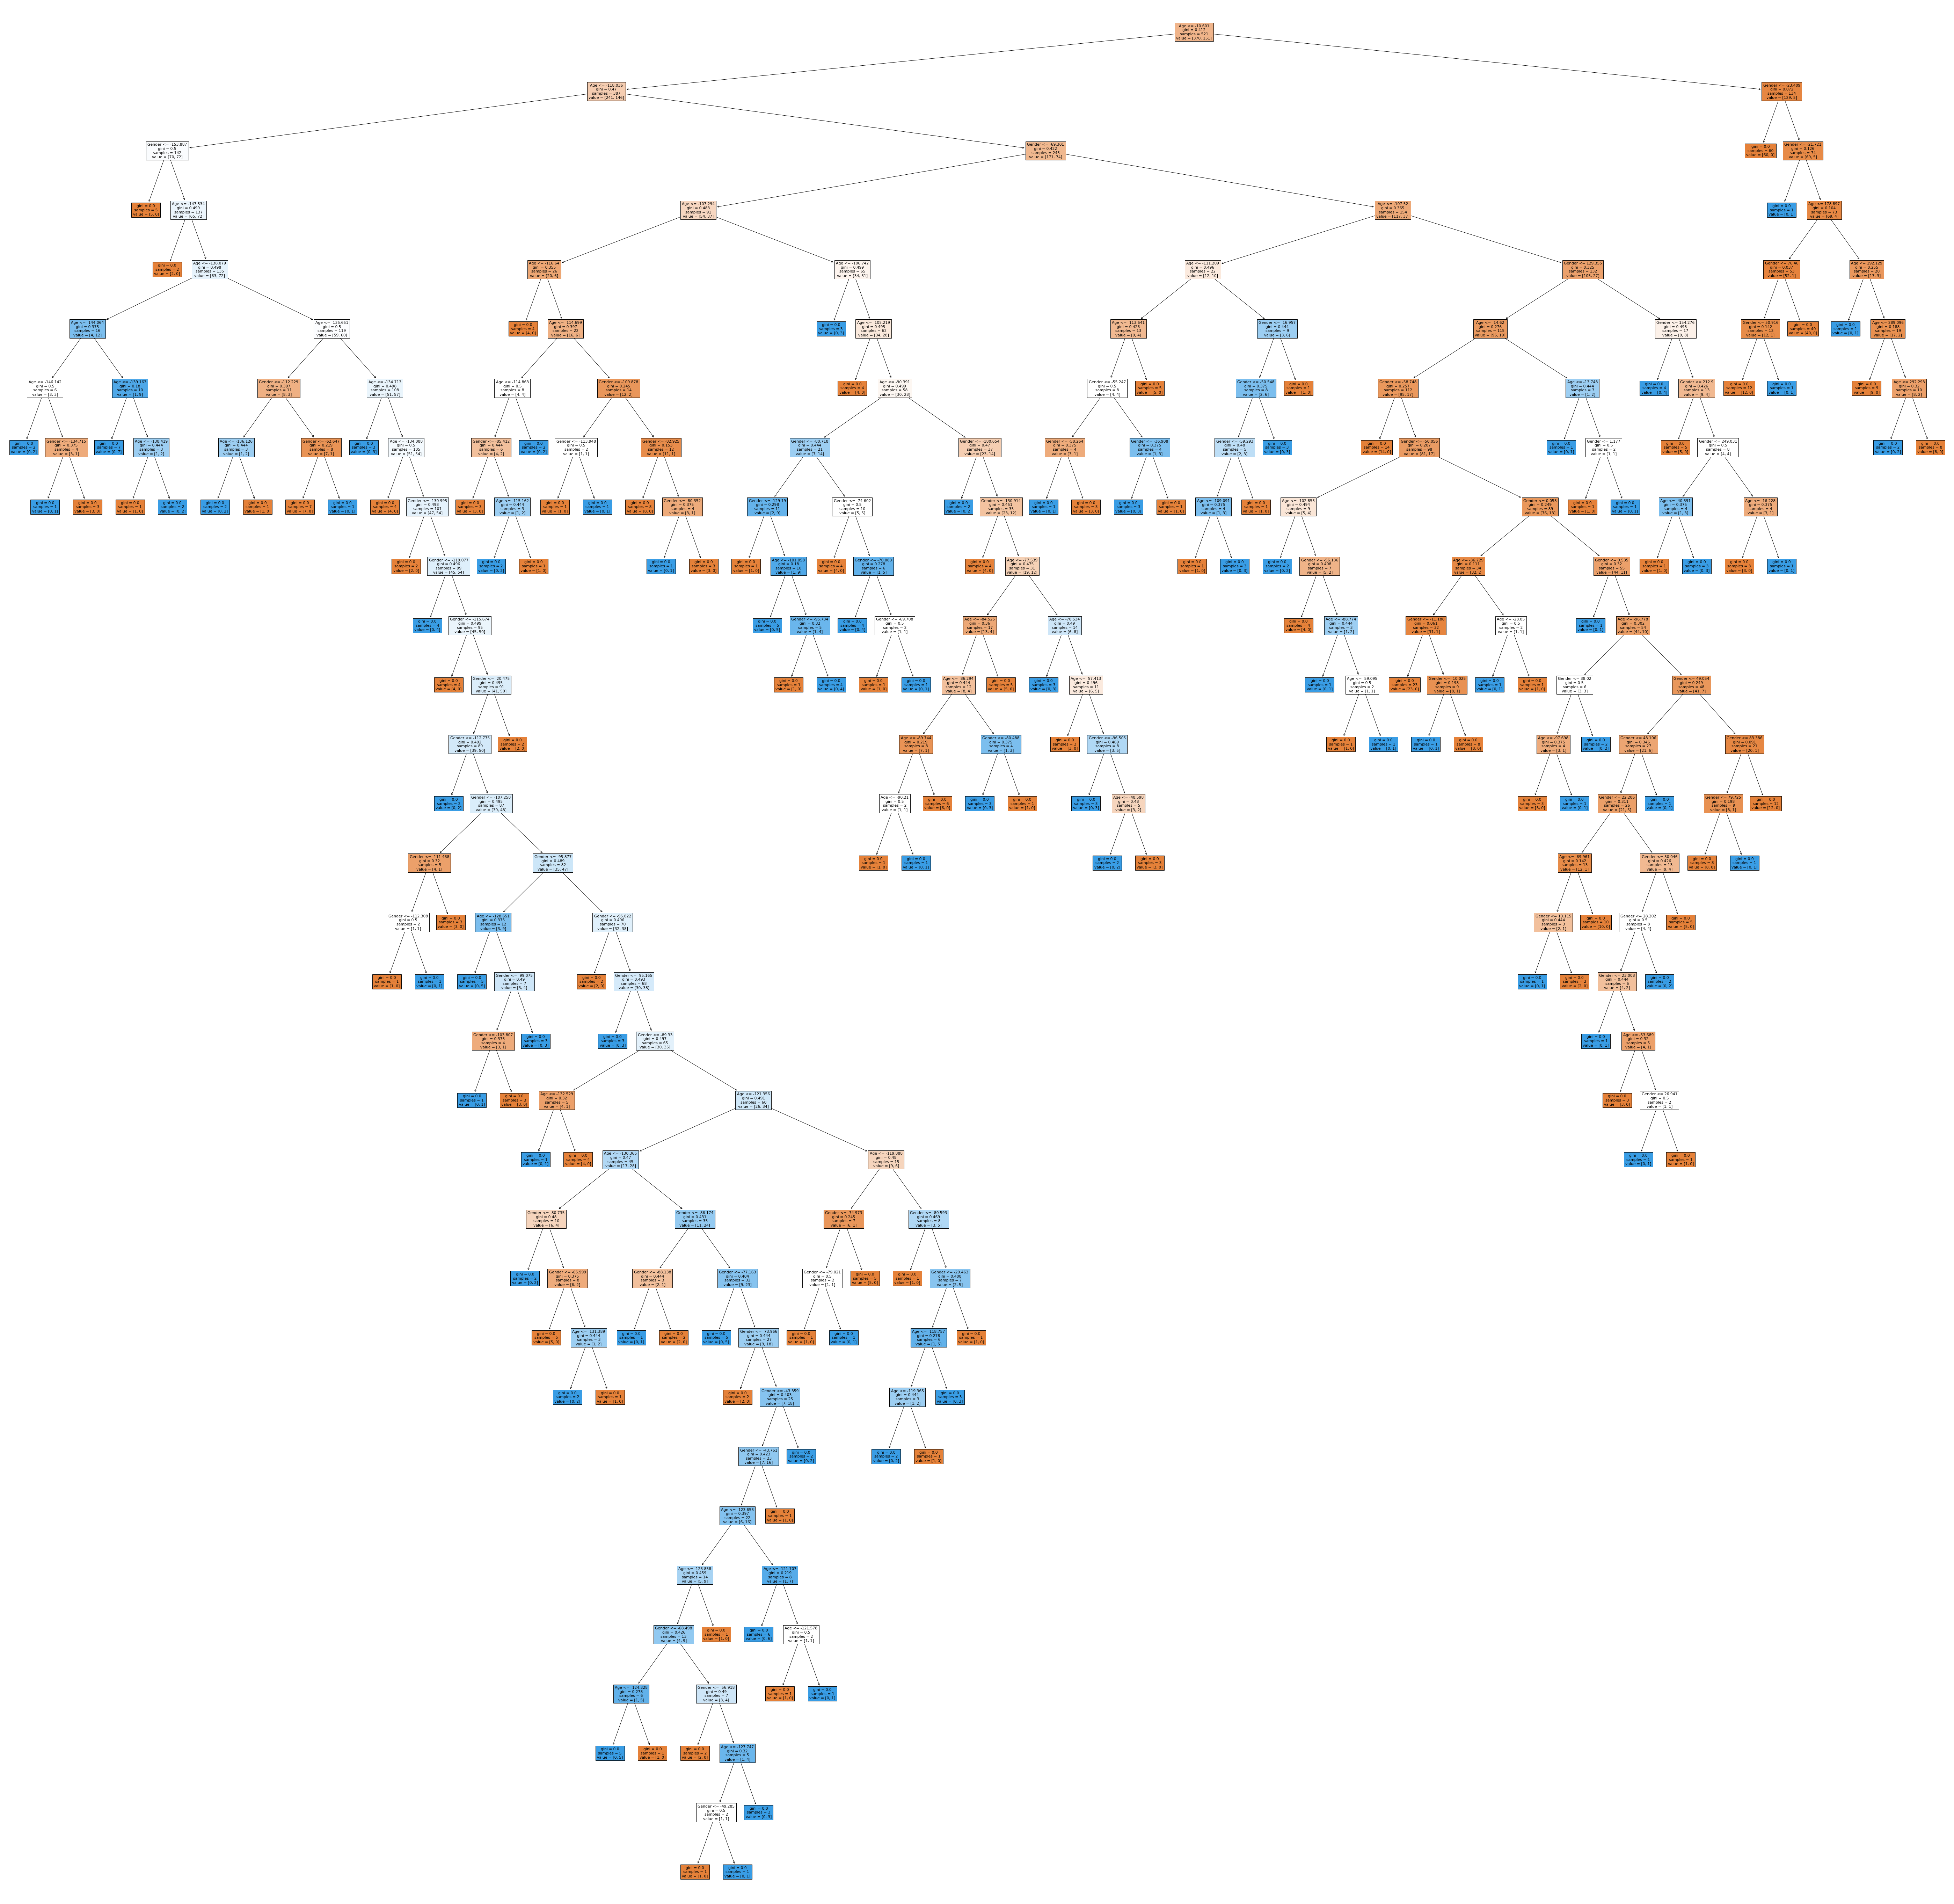

In [ ]:
import matplotlib.pyplot as plt
from sklearn import tree
fig=plt.figure(figsize=(100,100))
tree=tree.plot_tree(clf,feature_names=X.columns, filled=True)

ADABOOST

In [ ]:
X_train.shape

(521, 10)

In [ ]:
y_train.shape

(521,)

In [ ]:
from pandas.core.common import random_state
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier(max_depth=1)
Ada_clf=AdaBoostClassifier(n_estimators=20,base_estimator=dtc,random_state=40)
Ada_clf.fit(X_train, y_train)


AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1),
                   n_estimators=20, random_state=40)

In [ ]:
y_pred=Ada_clf.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
accuracy_score(y_test,y_pred)

0.6724137931034483

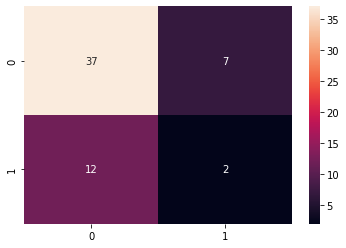

In [ ]:
import seaborn as sns

cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True)

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       0.76      0.84      0.80        44
           2       0.22      0.14      0.17        14

    accuracy                           0.67        58
   macro avg       0.49      0.49      0.48        58
weighted avg       0.63      0.67      0.65        58



In [ ]:
#HyperParameter Tuning using GridSearchCV to find the optimal parameters
from sklearn.model_selection import GridSearchCV
model=AdaBoostClassifier()
grid=GridSearchCV(estimator=model,param_grid={'n_estimators':range(1,50)})
grid.fit(X_train,y_train)

GridSearchCV(estimator=AdaBoostClassifier(),
             param_grid={'n_estimators': range(1, 50)})

In [ ]:
grid.best_params_

{'n_estimators': 1}

In [ ]:
y_pred=grid.predict(X_test)

In [ ]:
accuracy_score(y_test,y_pred)

0.7586206896551724

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
Ada_clf = AdaBoostClassifier(n_estimators=47,random_state=443,learning_rate=1)
Ada_clf.fit(X_train,y_train)

AdaBoostClassifier(learning_rate=1, n_estimators=47, random_state=443)

In [ ]:
y_pred=Ada_clf.predict(X_test)

In [ ]:
accuracy_score(y_test,y_pred)

0.6724137931034483

In [ ]:
from sklearn.metrics import log_loss
loss = log_loss(y_test, Ada_clf.predict_proba(X_test), eps=1e-15)

In [ ]:
loss

0.6635180278395395

In [ ]:
loss = log_loss(y_train, Ada_clf.predict_proba(X_train), eps=1e-15)
loss

0.6589713969508997

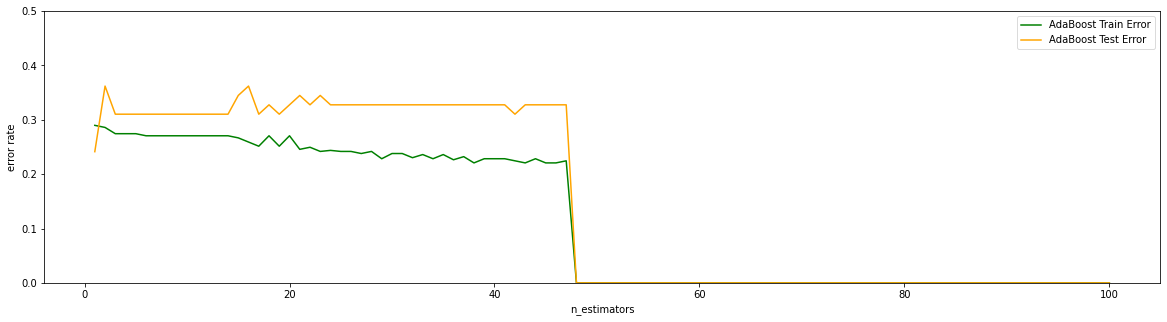

In [ ]:
from sklearn.metrics import zero_one_loss
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

n_estimators = 100

ada_real_err = np.zeros((n_estimators,))
for i, y_pred in enumerate(Ada_clf.staged_predict(X_test)):
    ada_real_err[i] = zero_one_loss(y_pred, y_test)

ada_real_err_train = np.zeros((n_estimators,))
for i, y_pred in enumerate(Ada_clf.staged_predict(X_train)):
    ada_real_err_train[i] = zero_one_loss(y_pred, y_train)

    
fig = plt.figure(figsize=(20,5))
ax = fig.add_subplot(111)
ax.plot(
    np.arange(n_estimators) + 1,
    ada_real_err_train,
    label="AdaBoost Train Error",
    color="green",
)
ax.plot(
    np.arange(n_estimators) + 1,
    ada_real_err,
    label="AdaBoost Test Error",
    color="orange",
)


ax.set_ylim((0.0, 0.5))
ax.set_xlabel("n_estimators")
ax.set_ylabel("error rate")

leg = ax.legend(loc="upper right", fancybox=True)
leg.get_frame().set_alpha(0.7)

plt.show()

SVM

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_train = pca.fit_transform(X_train)
X_test = pca.fit_transform(X_test)
explained_variance=pca.explained_variance_ratio_

In [ ]:
# Fitting SVM to the Training set

from sklearn.svm import SVC
classifier = SVC(kernel = 'poly', random_state = 102)

In [ ]:
trained_model=classifier.fit(X_train,y_train)
trained_model.fit(X_train,y_train )

SVC(kernel='poly', random_state=102)

In [ ]:
# Predicting the Test set results

y_pred = classifier.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


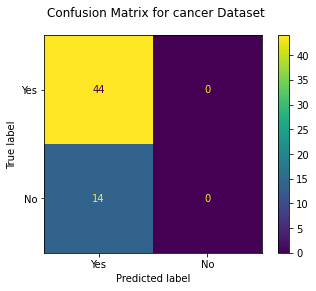

In [ ]:
# Making the Confusion Matrix
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt
fig=plot_confusion_matrix(trained_model, X_test, y_test,display_labels=["Yes","No"])
fig.figure_.suptitle("Confusion Matrix for cancer Dataset")
plt.show()

In [ ]:
from sklearn.metrics import classification_report
target_names = ['class 0', 'class 1']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.76      1.00      0.86        44
     class 1       0.00      0.00      0.00        14

    accuracy                           0.76        58
   macro avg       0.38      0.50      0.43        58
weighted avg       0.58      0.76      0.65        58



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


RANDOM FOREST

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=90, n_jobs=None, oob_score=False, random_state=None,verbose=0, warm_start=True)

In [ ]:
clf.fit(X_train,y_train)

RandomForestClassifier(n_estimators=90, warm_start=True)

In [ ]:
y_pred = clf.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


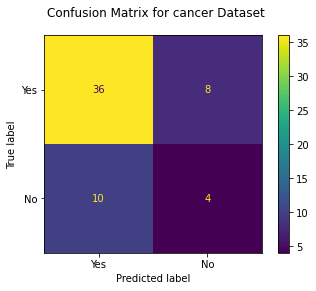

In [ ]:
#confusion Matrix
from sklearn.metrics import plot_confusion_matrix
fig=plot_confusion_matrix(clf, X_test, y_test,display_labels=["Yes","No"])
fig.figure_.suptitle("Confusion Matrix for cancer Dataset")
plt.show()

In [ ]:
from sklearn import metrics
print("Accuracy: ",metrics.accuracy_score(y_test,y_pred))

Accuracy:  0.6896551724137931


In [ ]:
from sklearn.metrics import classification_report
target_names = ['class 0', 'class 1']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.78      0.82      0.80        44
     class 1       0.33      0.29      0.31        14

    accuracy                           0.69        58
   macro avg       0.56      0.55      0.55        58
weighted avg       0.67      0.69      0.68        58

